<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Какие данные у нас есть:

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

In [1]:
!pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 1.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import seaborn as sns
import warnings
from tqdm import tqdm
#чтобы не отображалось предупреждение
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Избавимся от капса в названиях столбцов.

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Кажется не хватает данных в столбце tenure (сколько лет человек является клиентом банка?). Посмотрим на данные поближе.

In [8]:
data.isnull().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [9]:
data[data['tenure'].isnull() == True].sample(15)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2927,2928,15669656,Macdonald,632,France,Male,32,NaN,111589.33,1,1,1,170382.99,0
9864,9865,15652999,Milne,742,Germany,Male,33,NaN,137937.95,1,1,1,51387.10,0
329,330,15624528,L?,664,Germany,Male,26,NaN,116244.14,2,1,1,95145.14,0
2577,2578,15724145,William,616,Germany,Male,29,NaN,149318.55,1,1,0,140746.13,0
6794,6795,15694098,Jackson,575,France,Female,54,NaN,68332.96,1,1,1,144390.75,0
9931,9932,15647800,Greco,850,France,Female,34,NaN,101266.51,1,1,0,33501.98,0
7295,7296,15696361,Chung,648,Germany,Male,31,NaN,125681.51,1,0,1,129980.93,0
9619,9620,15779973,Gibbons,684,Germany,Male,35,NaN,99967.76,1,1,1,176882.08,0
4216,4217,15718852,Uren,794,France,Male,56,NaN,96951.21,1,1,1,71776.76,0
5865,5866,15735339,Lynch,663,France,Male,39,NaN,0.00,1,1,0,76884.05,0


С первого взгляда, данные с пропусками в столбце tenure, кажутся обычными. Можно попробовать удалить, но данных и так не очень много - 10000. Если удалим 909 строк, то это будет около 10% от общего количества данных, поэтому заполним пропущенные значения медианой.

In [10]:
data['tenure'].fillna(data['tenure'].median(), inplace=True)

In [11]:
data.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

<AxesSubplot:>

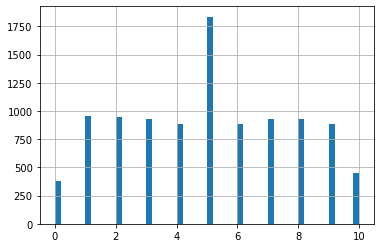

In [12]:
data['tenure'].hist(bins=50)

In [13]:
data.duplicated().sum()

0

Узнаем, есть ли корреляция между объектами.

In [14]:
data.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.004202,0.005840,0.000783,-0.006979,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customerid,0.004202,1.000000,0.005308,0.009497,-0.020331,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006979,-0.020331,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
balance,-0.009067,-0.012419,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


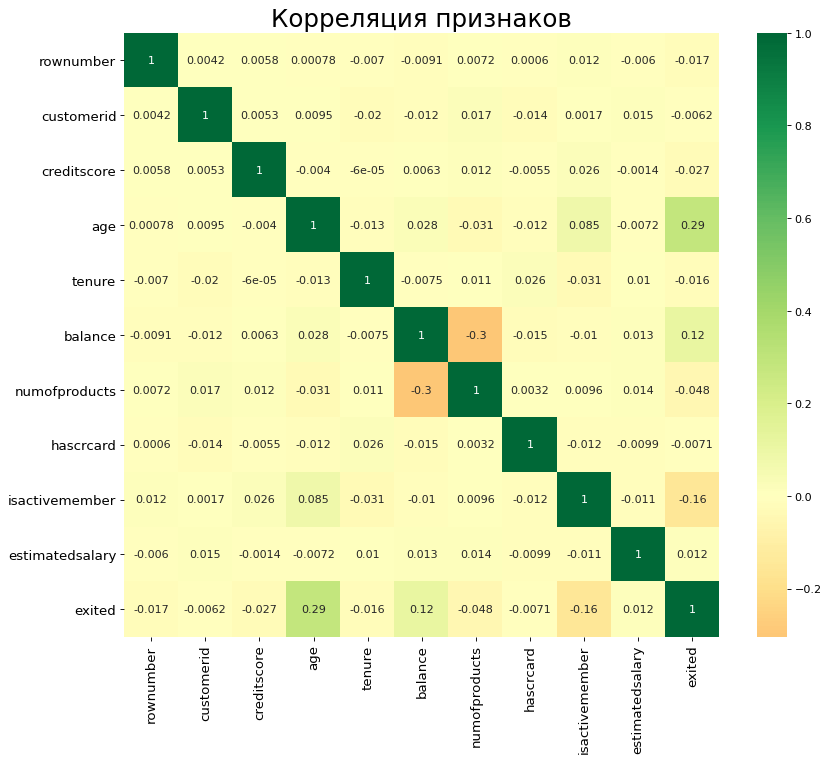

In [15]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Корреляции между признаками нет, значит нашей модели мультиколлинеарность не помешает.

Попробуем повнимательнее посмотреть на столбики. Может какие-то из них нам не нужны? Нашей модели точно не помогут фамилии, уникальный id клиента и индекс строки в данных.

In [16]:
data = data.drop(['rownumber', 'customerid', 'surname'], axis=1)
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Теперь посмотрим на каждый из столбцов лучше.

In [17]:
data['gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

In [18]:
data['geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: geography, dtype: float64

In [19]:
data['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Есть дисбаланс в целевом признаке, остальное вроде бы неплохо. В столбце с указанием стран клиентов из Франции - половина, из Германии и Испании - по 1/4. Мужчин и женщин примерно поровну.

Теперь преобразуем стобцы с категориальными признаками в численные.

In [21]:
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


***Вывод***

1. Избавились от пропущенных значений в столбце tenure
2. Явные дубликаты отсутсвуют
3. Корреляции между признаками не выявлено
4. Есть дисбаланс в целевом признаке: 0 - 80%, 1 - 20%.

## Исследование задачи

Т.к. у нас один датасет, то делить его будем на 3 части: обучаемая(60%), валидационная (20%) и тестовая (20%).

In [23]:
features = data.drop("exited", axis=1)
target = data["exited"]

In [24]:
# тестовая часть
features, features_test, target, target_test = train_test_split(
    features, target, test_size=0.2, train_size=0.8
)

In [25]:
# тренировочная и валидационная части
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, train_size =0.75
)

In [26]:
print('Тренировочная:', features_train.shape[0])
print('Валидационная:', features_valid.shape[0])
print('Тестовая:', features_test.shape[0])

Тренировочная: 6000
Валидационная: 2000
Тестовая: 2000


Стандартизируем наши данные.

In [27]:
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary', 'tenure', 'numofproducts']

scaler = StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [28]:
features_train

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
4333,0.751602,Germany,Male,-0.460125,0.362384,0.667988,0.806357,0,0,1.002732
9762,0.587129,Germany,Male,-1.692773,1.092383,0.920170,0.806357,1,0,-0.871927
9220,-0.543623,France,Male,2.005170,-0.367615,-1.226508,-0.915401,1,0,1.714919
4023,-1.191235,France,Male,-0.080849,1.092383,0.151187,-0.915401,1,0,-1.592287
3298,-0.954805,Germany,Male,-1.313497,1.822382,0.557868,0.806357,1,0,1.706799
...,...,...,...,...,...,...,...,...,...,...
5512,-0.245515,France,Male,-0.175668,-1.097615,0.779431,-0.915401,0,1,-0.270267
571,0.001194,France,Male,0.582884,-0.002616,-1.226508,-0.915401,1,0,-0.565821
3302,-0.595021,Spain,Male,-0.365306,-0.367615,1.363421,-0.915401,1,1,-1.403316
307,-0.224956,Germany,Male,-0.365306,0.727383,1.286664,0.806357,1,0,-1.195996


In [29]:
features_train_scaled=pd.get_dummies(features_train, drop_first=True)
features_valid_scaled=pd.get_dummies(features_valid, drop_first=True)
features_test_scaled=pd.get_dummies(features_test, drop_first=True)

In [30]:
features_train_scaled.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
4333,0.751602,-0.460125,0.362384,0.667988,0.806357,0,0,1.002732,1,0,1
9762,0.587129,-1.692773,1.092383,0.920170,0.806357,1,0,-0.871927,1,0,1
9220,-0.543623,2.005170,-0.367615,-1.226508,-0.915401,1,0,1.714919,0,0,1
4023,-1.191235,-0.080849,1.092383,0.151187,-0.915401,1,0,-1.592287,0,0,1
3298,-0.954805,-1.313497,1.822382,0.557868,0.806357,1,0,1.706799,1,0,1


In [32]:
print('Тренировочная:', features_train_scaled.shape[0])
print('Валидационная:', features_valid_scaled.shape[0])
print('Тестовая:', features_test_scaled.shape[0])

Тренировочная: 6000
Валидационная: 2000
Тестовая: 2000


Посмотрим, как на наших данных работает дерево решений, случайный лес и логистическая регрессия (без учета дисбаланса). Для каждой модели посмотрим метрику f1 и ROC-AUC.

Дерево решений

In [33]:
%%time

best_model_dt = None
best_model_dt_depth = 0
best_model_dt_leaf = 0
best_result_dt = 0
best_auc_dt = 0

for depth in tqdm(range(1, 13)):
    for i in range(1, 50):
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=i) 
            model_dt.fit(features_train_scaled, target_train) 
            predictions_dt = model_dt.predict(features_valid_scaled) 
            result_dt = f1_score(target_valid, predictions_dt)
            
            probabilities_valid = model_dt.predict_proba(features_valid_scaled)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc_dt = roc_auc_score(target_valid, probabilities_one_valid)
            if result_dt > best_result_dt:
                best_model_dt = model_dt
                best_model_dt_depth = depth
                best_model_dt_leaf = i
                best_result_dt = result_dt
                best_auc_dt = auc_roc_dt

print('f1:', best_result_dt)
print('auc_roc:', best_auc_dt) 
print(f'Гиперпараметры: \n\tmax_depth: {best_model_dt_depth} \n\tmin_samples_leaf: {best_model_dt_leaf}')

100%|██████████| 12/12 [00:12<00:00,  1.03s/it]

f1: 0.5706134094151213
auc_roc: 0.8298267450809822
Гиперпараметры: 
	max_depth: 5 
	min_samples_leaf: 13
CPU times: user 12.3 s, sys: 37.8 ms, total: 12.3 s
Wall time: 12.3 s


Случайный лес

In [34]:
%%time

best_model_rf = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
best_auc_rf = 0

for est in tqdm(range(40, 301, 20)):
    for dpth in range(1, 40):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=dpth) 
        model_rf.fit(features_train_scaled, target_train) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_rf = f1_score(target_valid, predictions_rf)
        
        probabilities_valid = model_rf.predict_proba(features_valid_scaled)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
            best_auc_rf = auc_roc_rf

print('f1:', best_result_rf) 
print('auc_roc:', best_auc_rf) 
print(f'Гиперпараметры: \n\tn_estimators: {best_model_rf_est} \n\tmax_depth: {best_model_rf_depth}')

100%|██████████| 14/14 [10:49<00:00, 46.38s/it]

f1: 0.5882352941176472
auc_roc: 0.8419151046269691
Гиперпараметры: 
	n_estimators: 80 
	max_depth: 25
CPU times: user 10min 43s, sys: 4.11 s, total: 10min 47s
Wall time: 10min 49s


Посмотрим теперь на логистическую регрессию.

In [35]:
%%time

best_model_lg = None
best_model_lg_it = 0
best_result_lg = 0
best_auc_lg = 0

for it in tqdm(range(100, 10000, 100)):
    model_lg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=it) 
    model_lg.fit(features_train_scaled, target_train) 
    predictions_lg = model_lg.predict(features_valid_scaled) 
    result_lg = f1_score(target_valid, predictions_lg)
    
    probabilities_valid = model_lg.predict_proba(features_valid_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_lg = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_lg > best_result_lg:
        best_model_lg = model_lg
        best_result_lg = result_lg
        best_model_lg_it = it
        best_auc_lg = auc_roc_lg

print('f1:', best_result_lg) 
print('auc_roc:', best_auc_lg) 
print(f'Гиперпараметры: \n\tn_estimators: {best_model_lg_it}')

100%|██████████| 99/99 [01:25<00:00,  1.16it/s]

f1: 0.31444241316270566
auc_roc: 0.7755891484705045
Гиперпараметры: 
	n_estimators: 100
CPU times: user 26.5 s, sys: 58.9 s, total: 1min 25s
Wall time: 1min 25s


***Вывод*** 

По 3 моделям мы можем сделать выбор в пользу случайного леса, тк случайный лес показывает результаты лучше, чем дерево решений и логистическая регрессия.

## Борьба с дисбалансом

Далее будем работать с моделью случайного леса, тк эта модель показала лучший результат по сравнению с другими моделями. Попробуем добавить встроенный параметр класса весов class_weight='balanced'.

In [36]:
%%time

best_model_rf = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
best_auc_rf = 0

for est in tqdm(range(40, 301, 20)):
    for dpth in range(1, 40):
        model_rf = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=est, max_depth=dpth) 
        model_rf.fit(features_train_scaled, target_train) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_rf = f1_score(target_valid, predictions_rf)
        
        probabilities_valid = model_rf.predict_proba(features_valid_scaled)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
            best_auc_rf = auc_roc_rf

print('f1:', best_result_rf) 
print('auc_roc:', best_auc_rf) 
print(f'Гиперпараметры: \n\tn_estimators: {best_model_rf_est} \n\tmax_depth: {best_model_rf_depth}')

100%|██████████| 14/14 [11:19<00:00, 48.53s/it]

f1: 0.6232439335887612
auc_roc: 0.8588341808680792
Гиперпараметры: 
	n_estimators: 80 
	max_depth: 11
CPU times: user 11min 14s, sys: 2.98 s, total: 11min 17s
Wall time: 11min 19s


При использовании встроенного аргумента class_weight='balanced' метрика f1 улучшилась, но не намного. Поэтому ппробуем вариант с увеличением выборки (upsampling) и вариант с уменьшением выборки (downsampling).

Начнем с upsamping. 

In [37]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Выбираем значение repeats=4, чтобы подставить его в новые features и target

In [38]:
features_upsampled, target_upsampled = upsample(features_train_scaled, target_train, 4)

In [39]:
%%time

best_model_rf_up = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
best_auc_rf = 0

for est in tqdm(range(40, 301, 20)):
    for dpth in range(1, 40):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=dpth) 
        model_rf.fit(features_upsampled, target_upsampled) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_rf = f1_score(target_valid, predictions_rf)
        
        probabilities_valid = model_rf.predict_proba(features_valid_scaled)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result_rf > best_result_rf:
            best_model_rf_up = model_rf
            best_result_rf = result_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
            best_auc_rf = auc_roc_rf

print('f1:', best_result_rf) 
print('auc_roc:', best_auc_rf) 
print(f'Гиперпараметры: \n\tn_estimators: {best_model_rf_est} \n\tmax_depth: {best_model_rf_depth}')

100%|██████████| 14/14 [15:27<00:00, 66.27s/it]

f1: 0.6182266009852218
auc_roc: 0.8531443616189378
Гиперпараметры: 
	n_estimators: 100 
	max_depth: 13
CPU times: user 15min 20s, sys: 4.69 s, total: 15min 25s
Wall time: 15min 27s


При upsampling метрика f1 улучшилась с 0.58 до 0.6. Будем экспирементировать дальше. Теперь попробуем downsampling.

In [40]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

Выбираем значение fraction=0.25, тк при нем показывается максимальное значение f1.

In [41]:
features_downsampled, target_downsampled = downsample(features_train_scaled, target_train, fraction=0.25)

In [42]:
%%time

best_model_rf_down = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
best_auc_rf = 0

for est in tqdm(range(40, 301, 20)):
    for dpth in range(1, 40):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=dpth) 
        model_rf.fit(features_downsampled, target_downsampled) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_rf = f1_score(target_valid, predictions_rf)
        
        probabilities_valid = model_rf.predict_proba(features_valid_scaled)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result_rf > best_result_rf:
            best_model_rf_down = model_rf
            best_result_rf = result_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
            best_auc_rf = auc_roc_rf

print('f1:', best_result_rf) 
print('auc_roc:', best_auc_rf) 
print(f'Гиперпараметры: \n\tn_estimators: {best_model_rf_est} \n\tmax_depth: {best_model_rf_depth}')

100%|██████████| 14/14 [06:28<00:00, 27.72s/it]

f1: 0.5986653956148714
auc_roc: 0.8580799597748751
Гиперпараметры: 
	n_estimators: 80 
	max_depth: 9
CPU times: user 6min 24s, sys: 2.02 s, total: 6min 26s
Wall time: 6min 28s


И при увеличении выборки, и при уменьшении выборки f1 улучшилось. Но при upsampling f1 стало равно 0.6, а при downsampling - 0.58.

Построим ROC-кривые для upsampling и для downsampling.

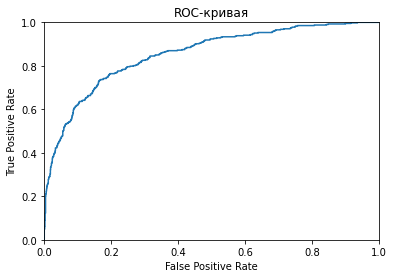

0.8531443616189378


In [43]:
#для upsampling

probabilities_valid = best_model_rf_up.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

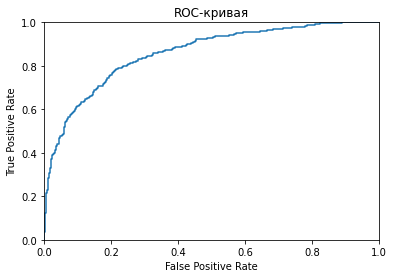

0.8580799597748751


In [44]:
#для downsampling

probabilities_valid = best_model_rf_down.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

***Вывод***

1. До борьбы с дисбалансом метрика f1 для случайного леса была равна 0.58.
2. После борьбы с дисбалансом с помощью upsampling f1 достиг 0.629. При downsampling f1=0.596

## Тестирование модели

Протестируем модель случайного леса и сравним с классификатором DummyClassifier.

In [45]:
clf = DummyClassifier(strategy='most_frequent', random_state=12345)
clf.fit(features_train_scaled, target_train)
score = clf.score(features_test_scaled, target_test)
print('Точность Dummy:', score)

Точность Dummy: 0.8045


In [46]:
# для модели с upsampling
predictions = best_model_rf_up.predict(features_test_scaled)
print("Accuracy:", accuracy_score(target_test, predictions))
print("f1:", f1_score(target_test, predictions))

Accuracy: 0.839
f1: 0.5924050632911392


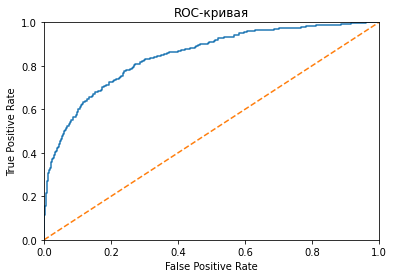

0.8470082766535425


In [47]:
# натрисуем ROC-кривую

probabilities_test = best_model_rf_up.predict_proba(features_test_scaled)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

Построим матрицу ошибок.

Text(0.5, 1.05, 'Confusion_matrix')

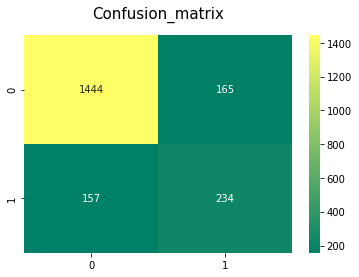

In [48]:
sns.heatmap(confusion_matrix(target_test, predictions), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

***Вывод***

Протестировали модель случайного леса на тестовой выборке, сравнили с моделью DummyClassifier, построили ROC-кривую и матрицу ошибок. 

1. Наша модель показывает лучше результаты, чем DummyClassifier.
2. Upsamplig работает чуть лучше, чем Downsampling.
3. AUC_ROC = 0.84, f1 = 0.58

## Вывод

1. Мы подготовили данные к обучению. В ходе подготовки обнаружили пропущенные значения, от которых избавились, заполнив средним значением. Убрали лишние столбцы, которые не помогли бы нашей модели обучаться (например, столбик с фамилией клиента или номером строки в датасете). Избавились от категориальных значений с помощью ohe-кодирования. Выявили дисбаланс целевого признака: 4:1.
2. Разделили нашу выборку на тренировочную, валидационную и тестовую (6:2:2). Обучили 3 модели: дерево решений, случайный лес и логистическую регрессию (без учета дисбаланса). Лучшим вариантом оказался случайный лес. 
3. Чтобы увеличить метрику f1, боролись с дисбалансом встроенными вариантами (class_weight='balanced'), но он не сильно улучшил работу модели. С помощью увеличения выборки (upsampling) и уменьшения выборки (downsampling) смогли улучшить метрику f1. UPsampling увеличил значение f1 с 0.58 до 0.6.
4. Протестировали нашу улучшенную модель на тестовой выборке. На тестовой выборке значение f1 = 0.64, значит downsampling помог справиться с дисбалансом классов. Построили матрицу ошибок и отрисовали ROC-кривую и получили roc_auc_score: 0.85 Наша модель работает лучше, чем "рандомный предсказатель".